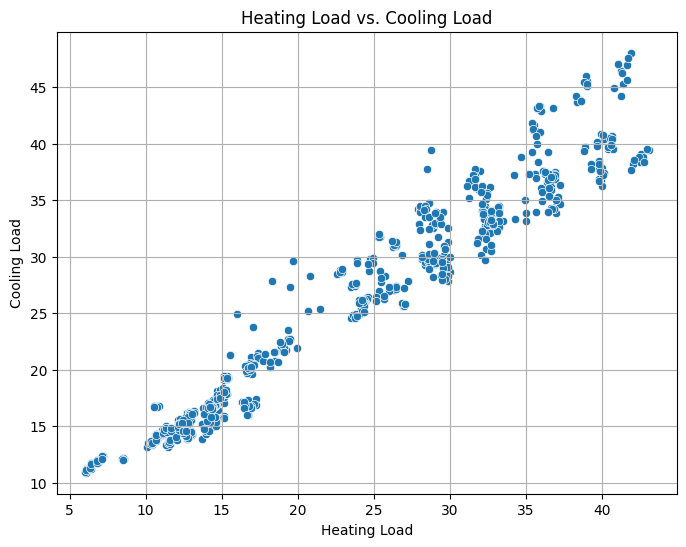

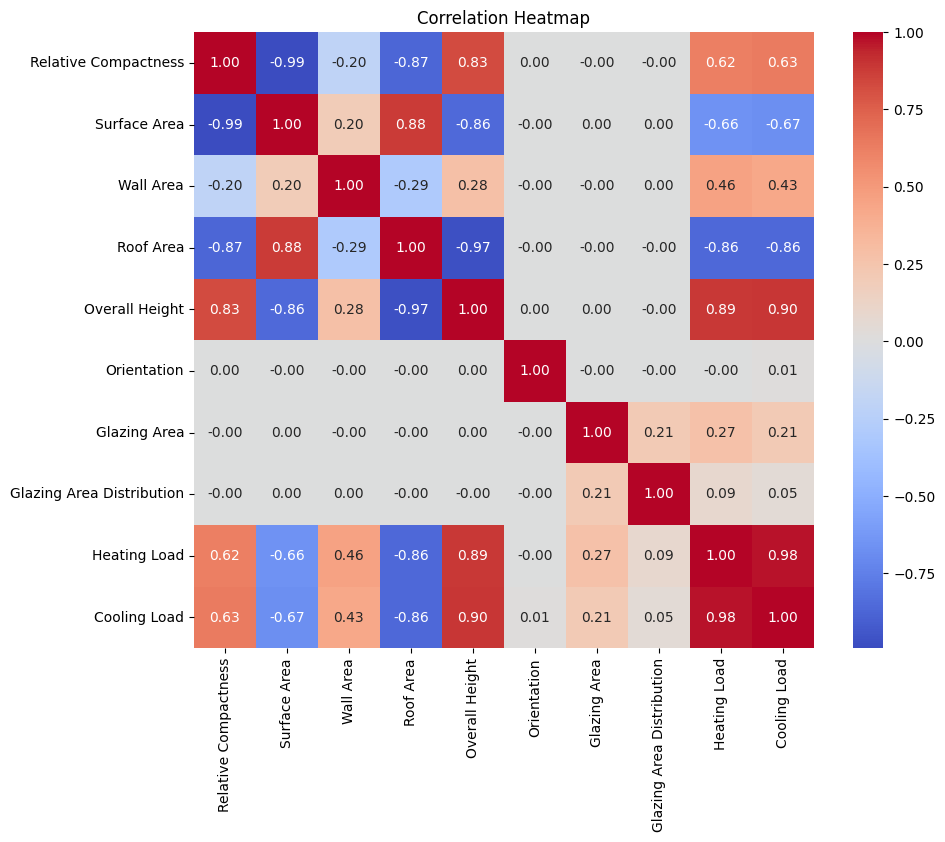

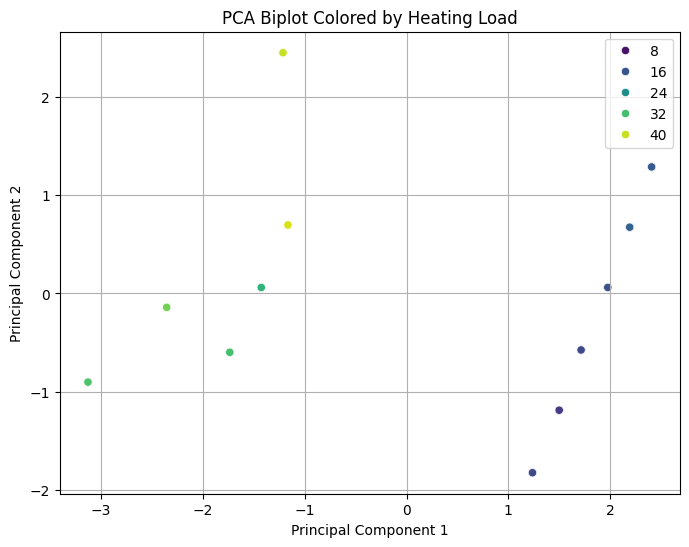

In [13]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'
df = pd.read_excel(url)

# Rename columns for clarity
df.columns = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
              'Overall Height', 'Orientation', 'Glazing Area',
              'Glazing Area Distribution', 'Heating Load', 'Cooling Load']

# Features and target
features = df.columns[:-2]
X = df[features]
y = df[['Heating Load', 'Cooling Load']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df = pd.concat([pca_df, y.reset_index(drop=True)], axis=1)

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Heating Load', y='Cooling Load', data=df)
plt.title('Heating Load vs. Cooling Load')
plt.xlabel('Heating Load')
plt.ylabel('Cooling Load')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='Heating Load', palette='viridis')
plt.title('PCA Biplot Colored by Heating Load')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()




